<h1 align="center"> 
DATS 6202, Fall 2018, Exercise_2_solution
</h1> 

<h4 align="center"> 
Author: Yuxiao Huang ([yuxiaohuang@gwu.edu](mailto:yuxiaohuang@gwu.edu))
</h4>

## Note
- Complete the missing parts indicated by # Implement me
- We expect you to follow a reasonable programming style. While we do not mandate a specific style, we require that your code to be neat, clear, **documented/commented** and above all consistent. **Marks will be deducted if these are not followed.**

## Overview
- Implement a linear regression model (using list and numpy array) and evaluate it on the Housing dataset

### My linear regression model

In [25]:
import numpy as np

class MyLinearRegression():
    """The linear regression model"""
    
    def __init__(self, eta=0.001, n_iter=100):
        # Initialize the learning rate
        self.eta = eta
        # Initialize the number of iterations
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """
        The fit function
        
        Parameters
        ----------
        X : the feature vector
        y : the target vector
        """
        
        # Initialize the costs
        self.costs_ = []
        
        # Initialize the weights for each feature (and the dummy feature, x0)
        self.w_ = np.zeros(1 + X.shape[1])

        # For each iteration
        for _ in range(self.n_iter):
            # Initialize the update (of the weight) for each feature (and the dummy feature, x0)
            delta_w = np.zeros(1 + X.shape[1])
            
            # Initialize the olss
            olss = []

            # For each sample
            for i in range(X.shape[0]): 
                # Get the net_input
                y_hat = self.net_input(X, i)

                # Get the error
                error = y[i] - y_hat
                
                # Update the olss
                olss.append(error ** 2)

                # Get the update (of the weight) for each feature
                for j in range(1, X.shape[1] + 1):
                    delta_w[j] += self.eta * error * X[i][j - 1]

                # Get the update (of the weight) for the dummy feature, x0
                delta_w[0] += self.eta * error

            # Update the weight for each feature (and the dummy feature, x0)
            self.w_ += delta_w
            
            # Update the costs
            self.costs_.append(sum(olss) / 2)
            
    def net_input(self, X, i):
        """
        Get the net input
        
        Parameters
        ----------
        X : the feature vector
        i : the ith sample
        
        Returns
        ----------
        The net input
       
        """
        
        # Initialize the weighted sum (i.e., the net input)
        weighted_sum = self.w_[0]
        
        # For each feature
        for j in range(1, X.shape[1] + 1):
            weighted_sum += X[i][j - 1] * self.w_[j]

        return weighted_sum

    def predict(self, X):
        """
        The predict function
        
        Parameters
        ----------
        X : the feature vector
        
        Returns
        ----------
        The predicted value of the target
        """
        
        # The predicted value
        y_pred = []
        
        # For each sample
        for i in range(X.shape[0]):
            # Get the net_input
            y_hat = self.net_input(X, i)
            
            # Update y_pred
            y_pred.append(y_hat)
    
        return y_pred

### Load the Housing dataset

In [26]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-2nd-edition'
                 '/master/code/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

### Get the feature and target vector

In [27]:
# Get the feature and target vector
X = df.iloc[:, :-1].values
y = df['MEDV'].values

### Divide the data into training and testing

In [28]:
from sklearn.model_selection import train_test_split

# Randomly choose 30% of the data for testing (using random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Standardize the data

In [29]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.transform(X_test)
y_train_std = std_scaler.fit_transform(y_train.reshape(-1, 1)).reshape(-1)
y_test_std = std_scaler.transform(y_test.reshape(-1, 1)).reshape(-1)

### Train and test the model

In [30]:
my_lr = MyLinearRegression()

# Fit the model
my_lr.fit(X_train_std, y_train_std)

# Predict the value
y_pred = my_lr.predict(X_test_std)

### Draw the residual plot

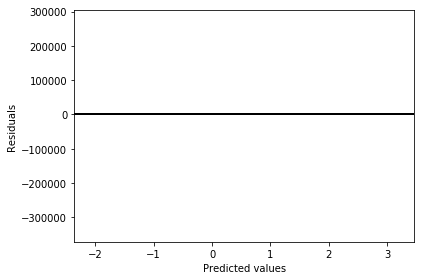

In [31]:
import matplotlib.pyplot as plt

%matplotlib inline 
# Draw the scatter plot of y_test_std and the residual
plt.scatter(y_pred, y_test_std - y_pred, c='blue', marker='s')

# Draw the horizontal line
plt.hlines(y=0, xmin=y_test_std.min() - 0.5, xmax=y_test_std.max() + 0.5, color='black', lw=2)

# Set the limit of x-axis
plt.xlim([y_test_std.min() - 0.5, y_test_std.max() + 0.5])

# Set the label for x-axis and y-axis
plt.xlabel('Predicted values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

### Draw the costs

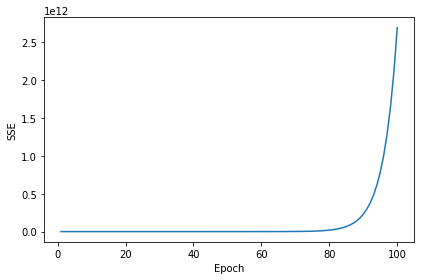

In [32]:
%matplotlib inline 
plt.plot(range(1, my_lr.n_iter+1), my_lr.costs_)
plt.ylabel('SSE')
plt.xlabel('Epoch')

plt.tight_layout()
plt.show()